In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:01, 50550938.18it/s]                               


16384it [00:00, 59713.38it/s]           


8192it [00:00, 37469.44it/s]            


In [5]:
import os

In [6]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_schema.csv', 'survey_results_public.csv', 'README.txt']

In [7]:
survey_raw_data = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [8]:
survey_raw_data.shape

(64461, 61)

In [9]:
survey_raw_data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [10]:
survey_raw_questions = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_schema.csv', index_col= 'Column').QuestionText

In [11]:
survey_raw_questions

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [12]:
survey_raw_questions.WebframeDesireNextYear

'Which web frameworks have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)'

Although the survey responses offer valuable insights, our analysis will focus on:

1. Demographics of survey participants and the global programming community.
2. Distribution of programming skills, experiences, and preferences.
3. Employment-related information, preferences, and opinions.

In [13]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [14]:
survey_data = survey_raw_data[selected_columns].copy()

In [15]:
survey_data.shape

(64461, 20)

In [16]:
survey_questions = survey_raw_questions[selected_columns].copy()

In [17]:
survey_questions.shape

(20,)

DATA CLEANING AND PREPARATION

Most columns are categorized as objects due to mixed types or empty values (NaN). Since every column has some empty values, we will need to address these and adjust the data types on a case-by-case basis.

In [18]:
survey_data.dtypes

,0
Country,object
Age,float64
Gender,object
EdLevel,object
UndergradMajor,object
Hobbyist,object
Age1stCode,object
YearsCode,object
YearsCodePro,object
LanguageWorkedWith,object


In [19]:
survey_questions.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [20]:
survey_data.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [21]:
survey_data['Age1stCode'] = pd.to_numeric(survey_data['Age1stCode'], errors= 'coerce')

In [22]:
survey_data.Age1stCode.unique()

array([13., 19., 15., 18., 16., 14., 12., 20., 42.,  8., 25., 22., 30.,
       17., 21., 10., 46.,  9.,  7., 11.,  6., nan, 31., 29.,  5., 28.,
       38., 23., 27., 41., 24., 53., 26., 35., 32., 40., 33., 36., 54.,
       48., 56., 45., 44., 34., 39., 51., 68., 50., 37., 47., 43., 52.,
       85., 64., 55., 58., 49., 76., 72., 73., 83., 63.])

In [23]:
survey_questions['YearsCode']

'Including any education, how many years have you been coding in total?'

In [24]:
survey_data.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [25]:
survey_data['YearsCode'] = pd.to_numeric(survey_data['YearsCode'], errors= 'coerce')

In [26]:
survey_data.YearsCode.unique()

array([36.,  7.,  4., 15.,  6., 17.,  8., 10., 35.,  5., 37., 19.,  9.,
       22., 30., 23., 20.,  2., nan,  3., 13., 25., 16., 43., 11., 38.,
       33., 24., 21., 12., 40., 27., 50., 46., 14., 18., 28., 32., 44.,
       26., 42., 31., 34., 29.,  1., 39., 41., 45., 47., 49., 48.])

In [27]:
survey_questions.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [28]:
survey_data.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [29]:
survey_data.YearsCodePro = pd.to_numeric(survey_data.YearsCodePro, errors = 'coerce')

In [30]:
survey_data.YearsCodePro.unique()

array([27.,  4., nan,  8., 13.,  2.,  7., 20.,  1., 23.,  3., 12., 17.,
       18., 10., 14., 29.,  6., 28.,  9., 15., 11., 16., 25.,  5., 21.,
       19., 35., 24., 32., 22., 30., 38., 26., 40., 33., 31., 34., 36.,
       39., 37., 41., 45., 47., 42., 46., 50., 43., 44., 48., 49.])

In [31]:
survey_data.dtypes

,0
Country,object
Age,float64
Gender,object
EdLevel,object
UndergradMajor,object
Hobbyist,object
Age1stCode,float64
YearsCode,float64
YearsCodePro,float64
LanguageWorkedWith,object


In [32]:
survey_data.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [33]:
survey_data.drop(survey_data[survey_data.Age > 100].index, inplace = True)
survey_data.drop(survey_data[survey_data.Age < 10].index, inplace = True)

In [34]:
survey_data.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


In [35]:
survey_data.drop(survey_data[survey_data.WorkWeekHrs > 140].index, inplace = True)

In [36]:
survey_data.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [37]:
survey_data.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

In [38]:
survey_data.Gender.value_counts()

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385
"Man;Non-binary, genderqueer, or gender non-conforming",121
"Woman;Non-binary, genderqueer, or gender non-conforming",92
Woman;Man,73
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",25


In [39]:
survey_data.where(~(survey_data.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [40]:
survey_data.Gender.value_counts()

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385


EDA AND VISUALIZATION

In [41]:
survey_data.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
25199,Brazil,23.0,Man,NaN,"Computer science, computer engineering, or sof...",Yes,12.0,11.0,10.0,C;Dart;Go;Java;Kotlin;Objective-C;SQL;Swift,C;Dart;Go;Java;Kotlin;Rust;SQL;Swift,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, game or graphic...",50.0,Slightly dissatisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Somewhat important
62048,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;C++;Java;JavaScript;Python;VBA,NaN,Once a year,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
18227,United States,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,20.0,10.0,7.0,Java;Perl,Kotlin,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist;...,40.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Rarely: 1-2 days per year or less,Very important
15983,Germany,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,10.0,NaN,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;Haskell;Java;JavaScript;...,Once a year,Call a coworker or friend;Visit Stack Overflow...,"Not employed, but looking for work","Developer, back-end;Developer, full-stack;Deve...",NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,Critically important
41027,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
6054,Australia,59.0,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Yes,50.0,2.0,NaN,NaN,NaN,NaN,Visit Stack Overflow;Watch help / tutorial videos,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,Diversity of the company or organization;How w...,NaN,NaN
43326,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,17.0,10.0,3.0,NaN,NaN,NaN,NaN,Employed part-time,"Designer;Developer, back-end;Developer, deskto...",NaN,Very satisfied,NaN,NaN,Not at all important/not necessary
14614,Italy,49.0,Man,Some college/university study without earning ...,"Another engineering discipline (such as civil,...",Yes,12.0,37.0,24.0,Assembly;C#;C++;HTML/CSS;JavaScript;PHP;SQL;VBA,C#;HTML/CSS;JavaScript;PHP;SQL,NaN,Play games;Visit Stack Overflow;Go for a walk ...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",50.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Not at all important/not necessary
20256,Nigeria,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,19.0,8.0,3.0,C#;HTML/CSS;Java;JavaScript;Python;SQL,C#;HTML/CSS;JavaScript;Python;SQL;Swift;TypeSc...,NaN,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Database administrator;Developer, back-end;Dev...",8.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Critically important
30774,United States,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,6.0,2.0,Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScri...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Designer;Developer, bac...",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Very important


In [42]:
survey_questions.Country

'Where do you live?'

In [43]:
survey_data.Country.nunique()

183

In [44]:
top_countries = survey_data.Country.value_counts().head(15)

In [45]:
top_countries

,count
Country,
United States,12371
India,8364
United Kingdom,3881
Germany,3864
Canada,2175
France,1884
Brazil,1804
Netherlands,1332
Poland,1259


A significant portion of respondents comes from the US and India, likely influenced by the survey's English language, leading to a potential underrepresentation of non-English-speaking countries.

<Axes: title={'center': 'Where do you live?'}, xlabel='Country', ylabel='count'>

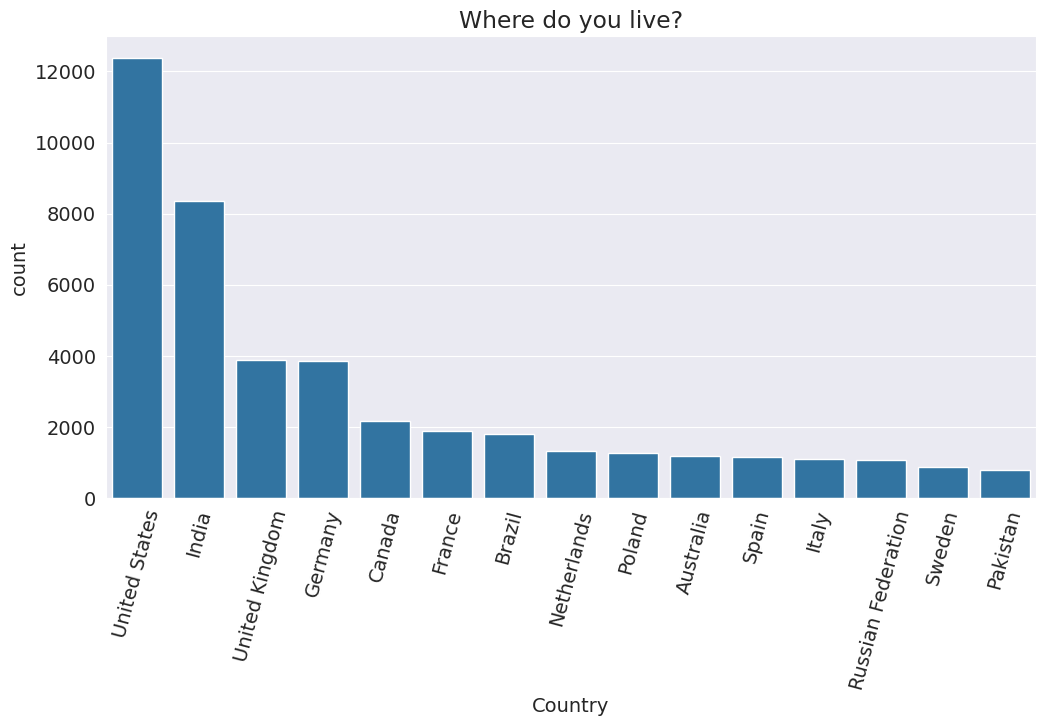

In [46]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 75)
plt.title(survey_questions.Country)
sns.barplot(x=top_countries.index, y = top_countries)

In [47]:
survey_questions.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [48]:
survey_data.Age.nunique()

105

Around 20-45 years old respondents dominate, reflecting a trend in the programming field where many young people have pursued computer science recently.

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75.]),
 <BarContainer object of 13 artists>)

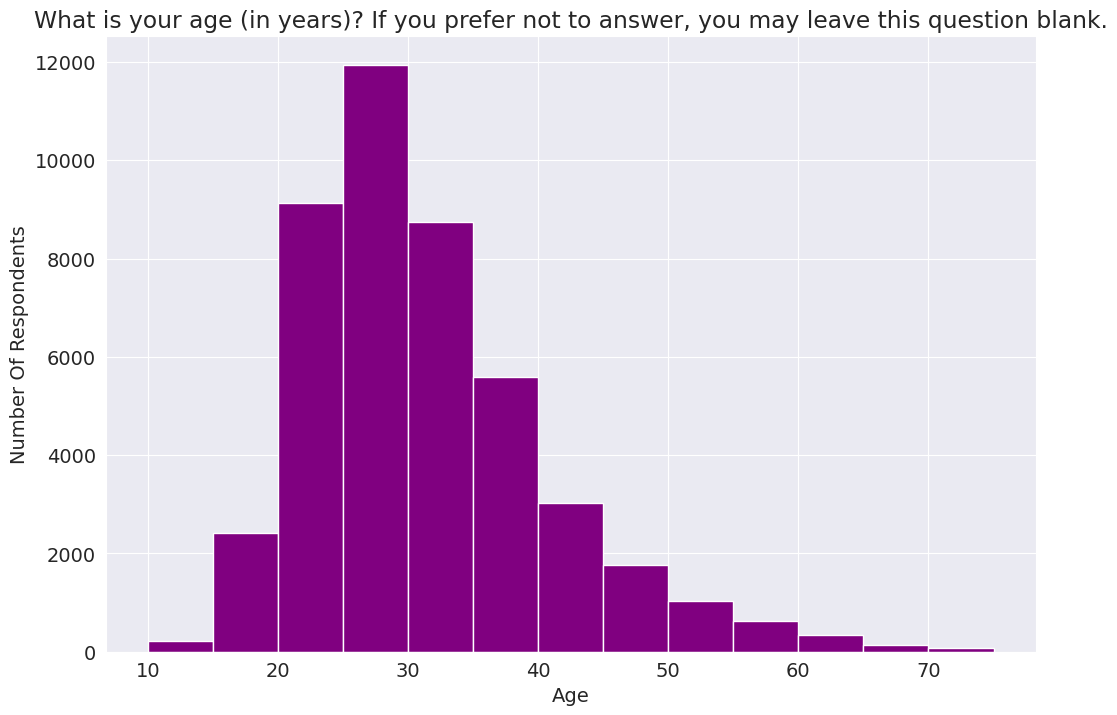

In [49]:
plt.figure(figsize = (12, 8))
plt.title(survey_questions.Age)
plt.xlabel('Age')
plt.ylabel('Number Of Respondents')

plt.hist(survey_data.Age, np.arange(10, 80, 5), color = 'purple')

In [50]:
gender_counts = survey_data.Gender.value_counts(dropna = False)

In [51]:
gender_counts

,count
Gender,
Man,45895
NaN,14191
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385


Women and non-binary respondents make up only 8%, which is below the estimated 12% representation in the programming community.

([<matplotlib.patches.Wedge at 0x7913413b27a0>,
 [Text(0.6842470564156528, -0.8612815833317897, 'Man'),
  Text(-0.4934478967644441, 0.9831119840479755, 'nan'),
  Text(-1.0722804576603289, 0.24538667469884304, 'Woman'),
  Text(-1.099805434450253, 0.02068831442361343, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.37322566713581057, -0.46978995454461253, '71.4%'),
  Text(-0.2691533982351513, 0.5362429003898047, '22.1%'),
  Text(-0.5848802496329066, 0.1338472771084598, '6.0%'),
  Text(-0.5998938733365016, 0.011284535140152778, '0.6%')])

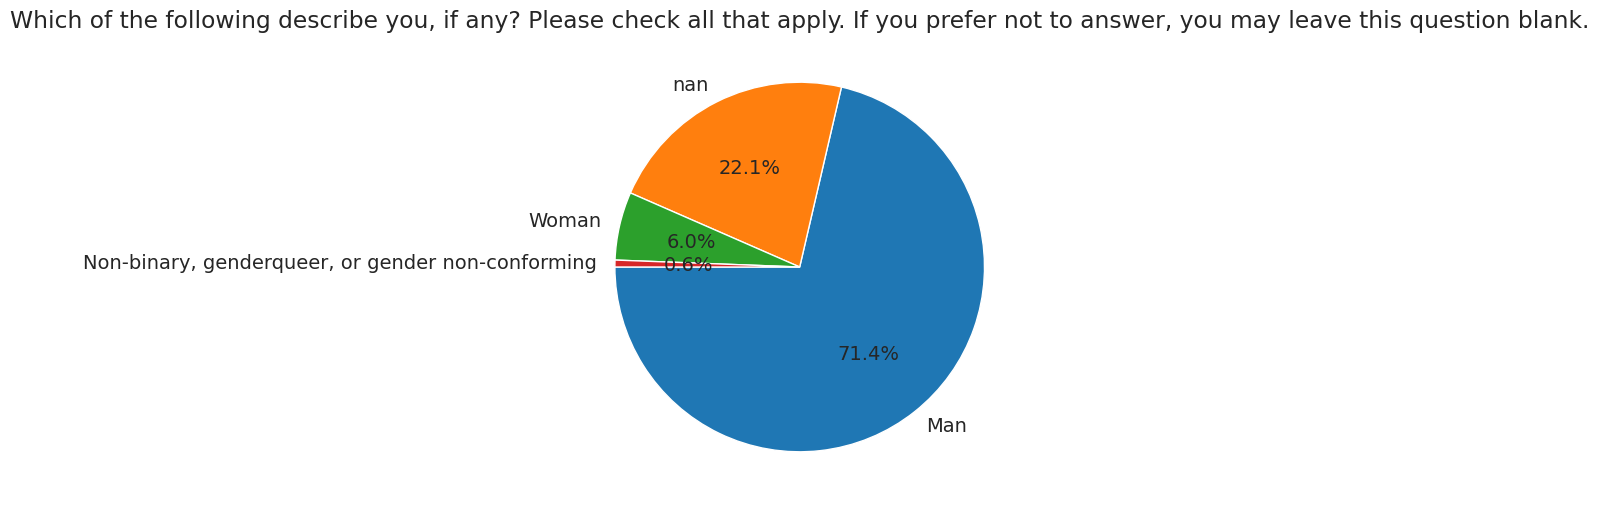

In [52]:
plt.figure(figsize=(6, 6))
plt.title(survey_questions.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)

In [53]:
survey_questions.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [54]:
survey_data.EdLevel.value_counts()

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26356
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",13024
Some college/university study without earning a degree,7163
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",4724
"Associate degree (A.A., A.S., etc.)",1831
"Other doctoral degree (Ph.D., Ed.D., etc.)",1681
Primary/elementary school,929
"Professional degree (JD, MD, etc.)",793
I never completed any formal education,480


Text(0, 0.5, '')

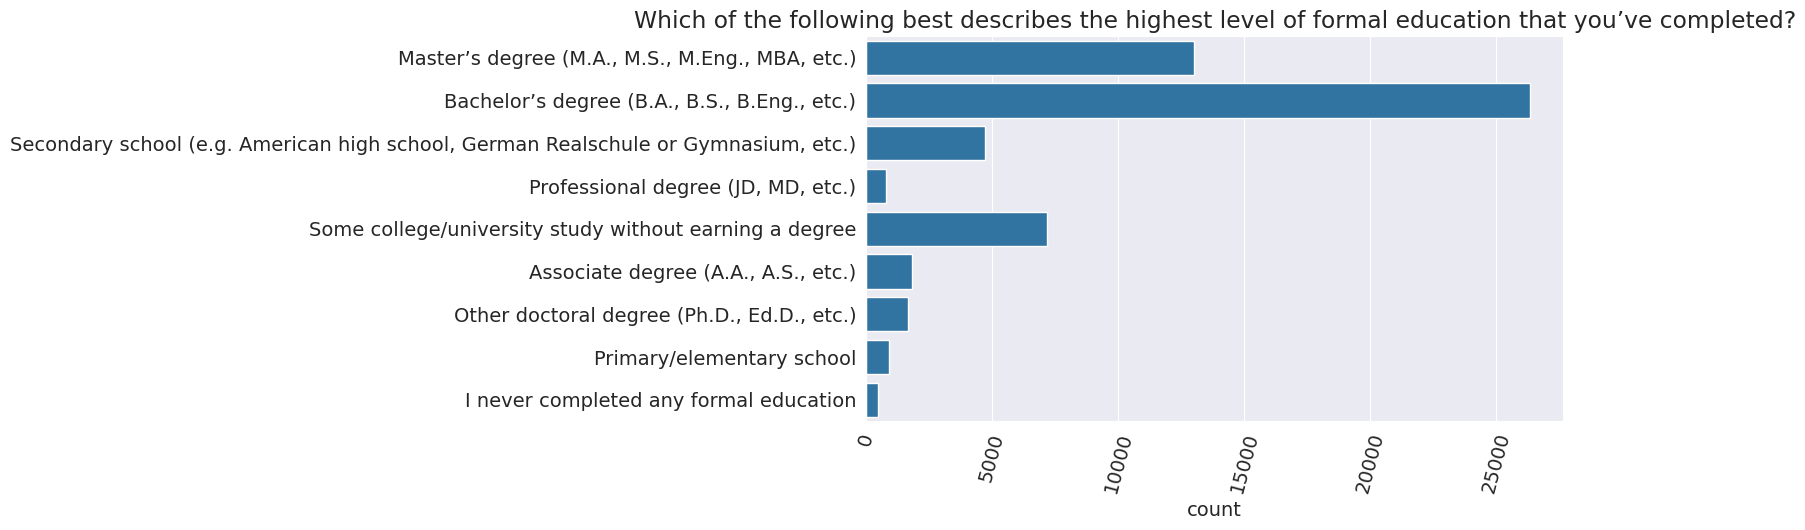

In [55]:
sns.countplot(y = survey_data.EdLevel)
plt.xticks(rotation=75)
plt.title(survey_questions['EdLevel'])
plt.ylabel(None)

In [56]:
survey_questions.UndergradMajor

'What was your primary field of study?'

In [57]:
underGrad_pct = survey_data.UndergradMajor.value_counts() * 100 / survey_data.UndergradMajor.count()

In [58]:
underGrad_pct

,count
UndergradMajor,
"Computer science, computer engineering, or software engineering",61.939193
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",9.354195
"Information systems, information technology, or system administration",7.983168
"A natural science (such as biology, chemistry, physics, etc.)",4.316561
Mathematics or statistics,3.627097
Web development or web design,3.502637
"A business discipline (such as accounting, finance, marketing, etc.)",2.700567
"A humanities discipline (such as literature, history, philosophy, etc.)",1.969616
"A social science (such as anthropology, psychology, political science, etc.)",1.821450


Interestingly, 40% of degree-holding programmers studied fields outside computer science, indicating that a degree in this field is not a prerequisite for success in programming.

Text(0.5, 0, 'Percentage')

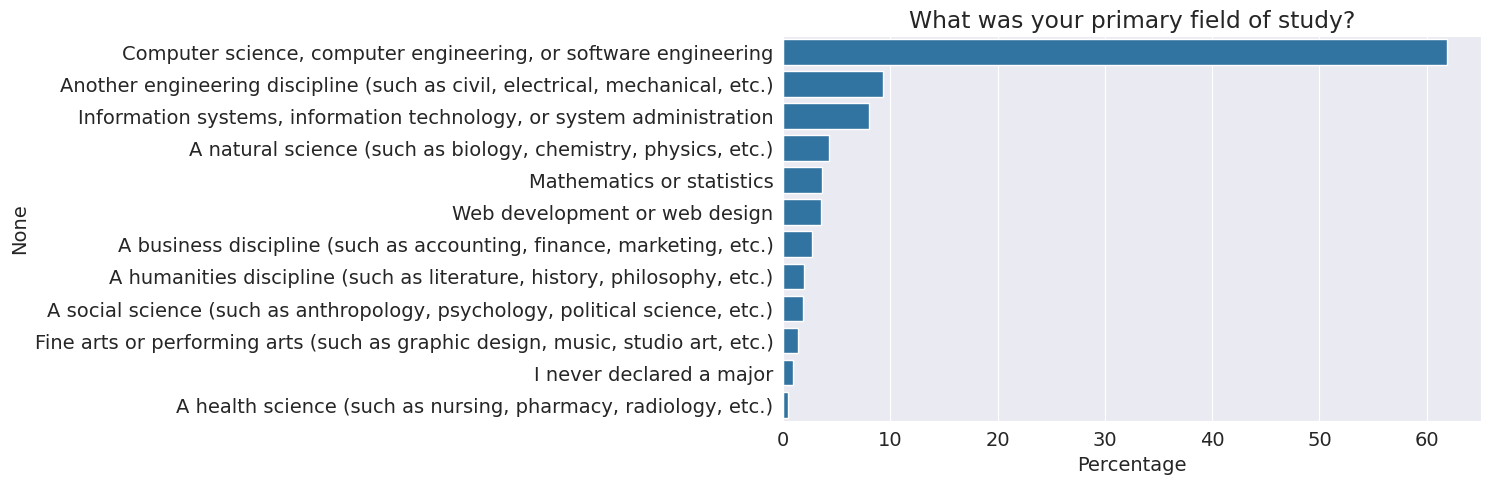

In [59]:
sns.barplot(x = underGrad_pct, y = underGrad_pct.index)
plt.title(survey_questions.UndergradMajor)
plt.ylabel('None')
plt.xlabel('Percentage')

In [60]:
survey_questions.Employment

'Which of the following best describes your current employment status?'

Nearly 10% of respondents are part-time employees or freelancers, which can serve as a valuable entry point into the industry.

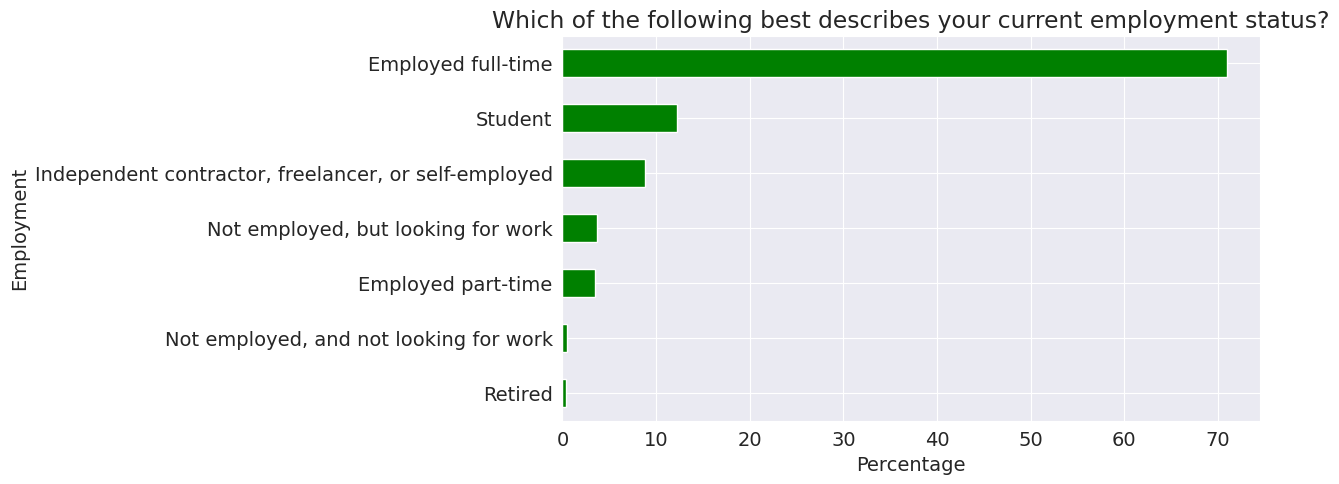

In [61]:
(survey_data.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(survey_questions.Employment)
plt.xlabel('Percentage');

In [62]:
survey_questions.DevType

'Which of the following describe you? Please select all that apply.'

In [63]:
survey_data.DevType.value_counts()

,count
DevType,
"Developer, full-stack",4396
"Developer, back-end",3056
"Developer, back-end;Developer, front-end;Developer, full-stack",2214
"Developer, back-end;Developer, full-stack",1465
"Developer, front-end",1390
...,...
"Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Developer, QA or test;Senior executive/VP",1
"Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Product manager;Senior executive/VP",1
"Developer, back-end;Developer, full-stack;Developer, mobile;DevOps specialist;Educator;System administrator",1


In [64]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
dev_type_df = split_multicolumn(survey_data.DevType)

In [65]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

,0
"Developer, back-end",26996
"Developer, full-stack",26915
"Developer, front-end",18128
"Developer, desktop or enterprise applications",11687
"Developer, mobile",9406
DevOps specialist,5915
Database administrator,5658
Designer,5262
System administrator,5185
"Developer, embedded applications or devices",4701


ASKING AND ANSWERING QUESTIONS

Q: What are the most popular programming languages in 2020?

In [68]:
survey_data.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

In [69]:
survey_questions.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [70]:
survey_data.LanguageWorkedWith.value_counts()

,count
LanguageWorkedWith,
HTML/CSS;JavaScript;PHP;SQL,1065
HTML/CSS;JavaScript,895
C#;HTML/CSS;JavaScript;SQL,849
C#;HTML/CSS;JavaScript;SQL;TypeScript,744
HTML/CSS;JavaScript;TypeScript,693
...,...
C;C#;C++;HTML/CSS;Objective-C;SQL;Swift,1
C++;Dart;HTML/CSS;JavaScript;TypeScript,1
Bash/Shell/PowerShell;Go;Java;JavaScript;SQL,1


In [85]:
languages_df = split_multicolumn(survey_data.LanguageWorkedWith)

In [100]:
languages_df_percent = languages_df.mean().sort_values(ascending = False) * 100
languages_df_percent

,0
JavaScript,59.893323
HTML/CSS,55.801947
SQL,48.444935
Python,39.001026
Java,35.618760
Bash/Shell/PowerShell,29.239884
C#,27.803004
PHP,23.130035
TypeScript,22.461357
C++,21.114670


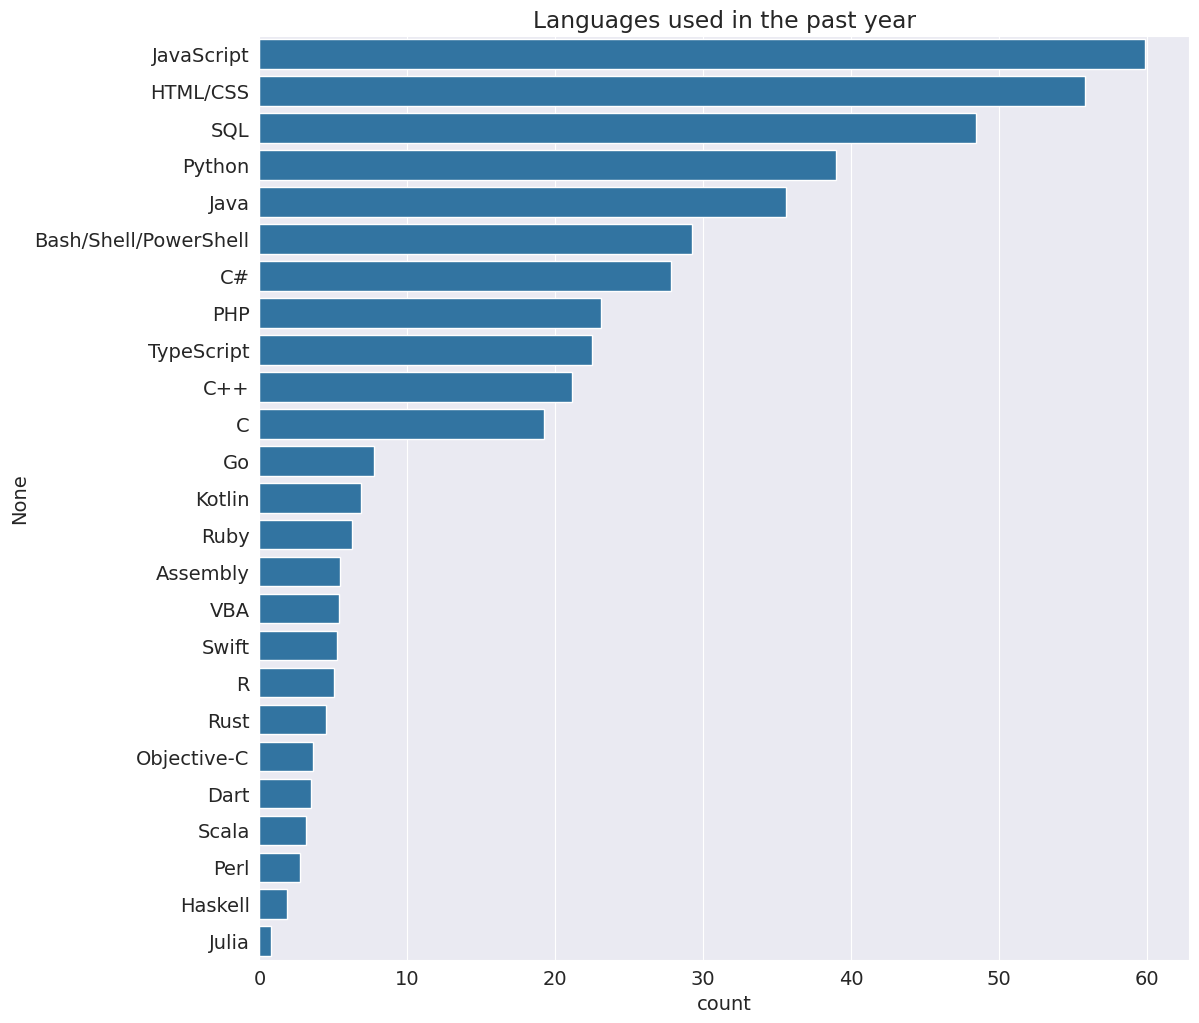

In [88]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_df_percent, y=languages_df_percent.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?


In [90]:
survey_data.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

In [91]:
survey_questions.Employment

'Which of the following best describes your current employment status?'

In [93]:
survey_data.Employment.value_counts()

,count
Employment,
Employed full-time,44958
Student,7734
"Independent contractor, freelancer, or self-employed",5619
"Not employed, but looking for work",2324
Employed part-time,2200
"Not employed, and not looking for work",318
Retired,241


In [96]:
student_data = survey_data[survey_data.Employment == 'Student']
students_used_lang = split_multicolumn(student_data.LanguageWorkedWith)

In [97]:
students_used_lang

,Bash/Shell/PowerShell,C,HTML/CSS,Java,Python,SQL,C#,JavaScript,Objective-C,Scala,...,Ruby,Julia,Assembly,Kotlin,Go,Rust,Dart,VBA,Haskell,Perl
14,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,True,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,False,False,True,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,False,True,True,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64421,False,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,False,False,True,False,True
64426,False,True,True,True,True,True,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
64441,False,True,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
student_lang_used_perc = students_used_lang.mean().sort_values(ascending = False) * 100
student_lang_used_perc

,0
HTML/CSS,59.749160
Python,56.490820
JavaScript,52.275666
Java,49.107836
C++,41.802431
C,40.884407
SQL,39.216447
Bash/Shell/PowerShell,25.536592
C#,24.605637
PHP,23.674683


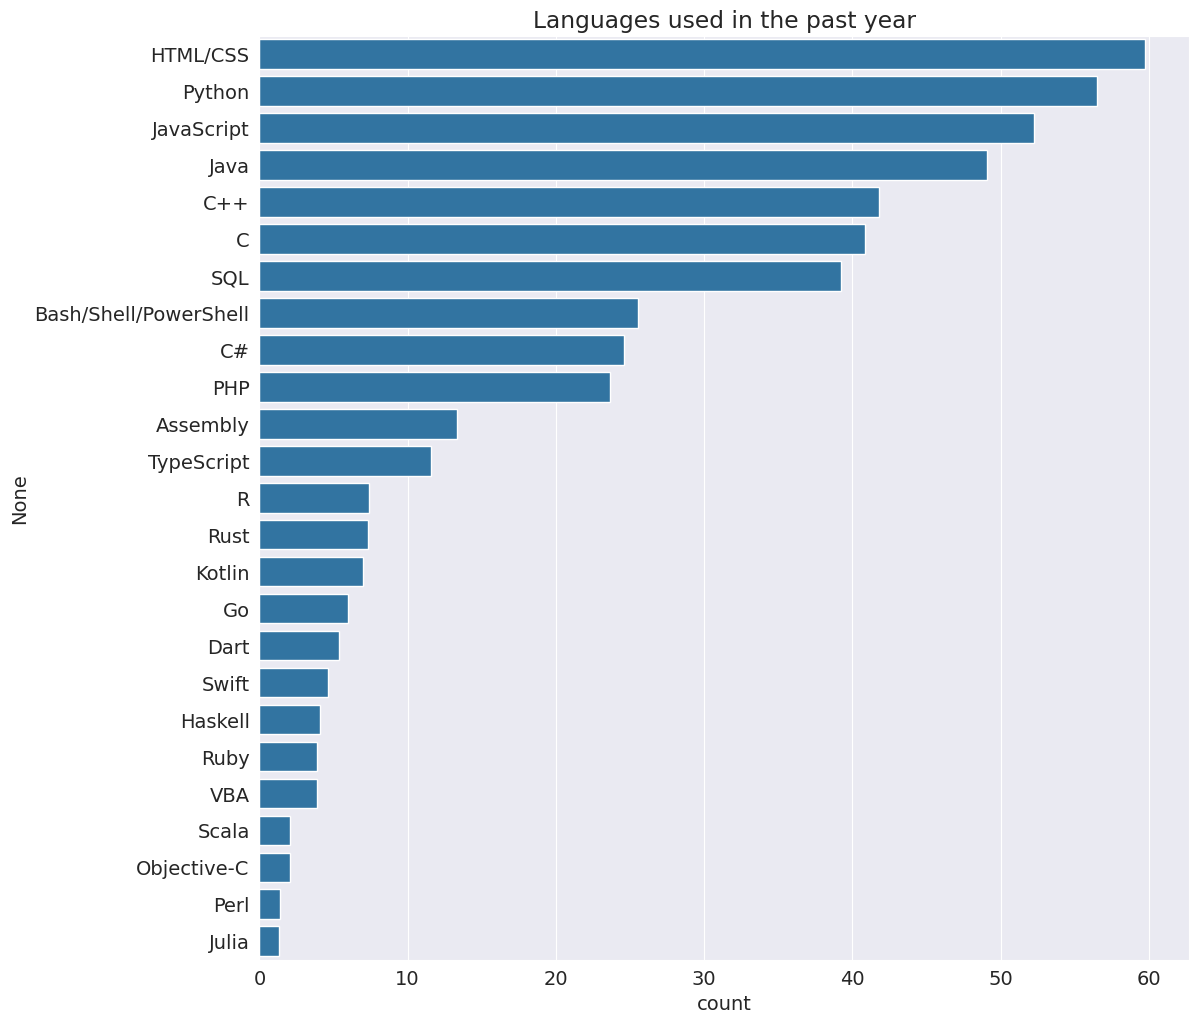

In [101]:
plt.figure(figsize=(12, 12))
sns.barplot(x=student_lang_used_perc, y=student_lang_used_perc.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Q: Which languages are the most people interested to learn over the next year?


In [107]:
survey_questions.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [108]:
survey_data.LanguageDesireNextYear.value_counts(ascending = False)

,count
LanguageDesireNextYear,
Python,1142
Rust,524
HTML/CSS;JavaScript;TypeScript,498
C#,455
Go,410
...,...
Assembly;Bash/Shell/PowerShell;C;C#;C++;Go;Kotlin;Objective-C;Perl;R;Ruby,1
C#;Haskell;JavaScript;Python;R;TypeScript,1
Dart;Go;HTML/CSS;JavaScript;Objective-C;Ruby;SQL;Swift;TypeScript,1


In [110]:
languages_desired_nxt_yr = split_multicolumn(survey_data.LanguageDesireNextYear).mean().sort_values(ascending = False) * 100

In [111]:
languages_desired_nxt_yr

,0
Python,41.143906
JavaScript,40.425466
HTML/CSS,32.028116
SQL,30.799614
TypeScript,26.451653
C#,21.058688
Java,20.464653
Go,19.432090
Bash/Shell/PowerShell,18.057413
Rust,16.270643


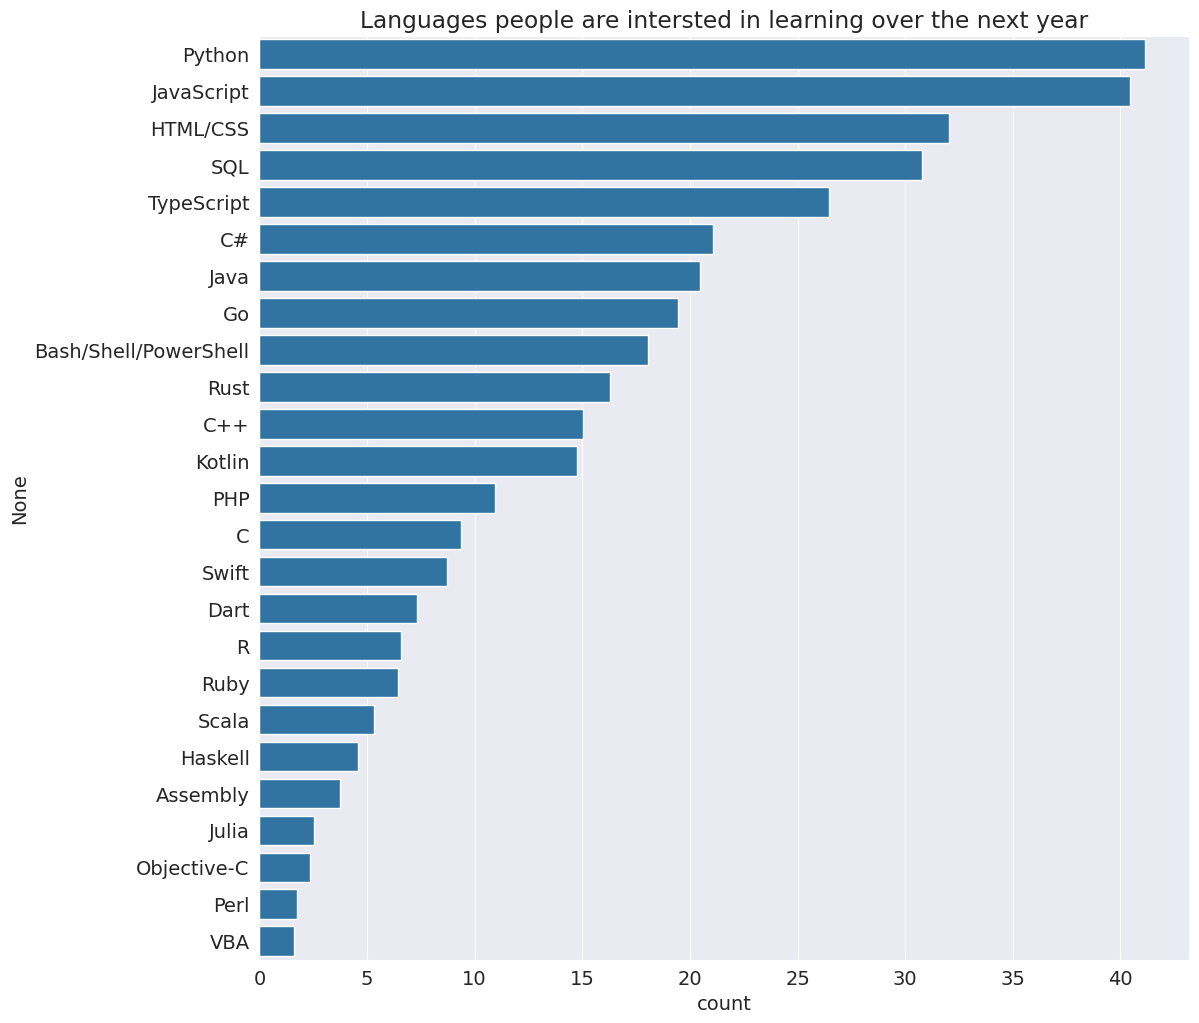

In [113]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_desired_nxt_yr, y=languages_desired_nxt_yr.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [115]:
countries_df = survey_data.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [117]:
high_response_countries_df = countries_df.loc[survey_data.Country.value_counts() > 250].head(15)

In [118]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


Q: How important is it to start young to build a career in programming?


In [120]:
survey_questions.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

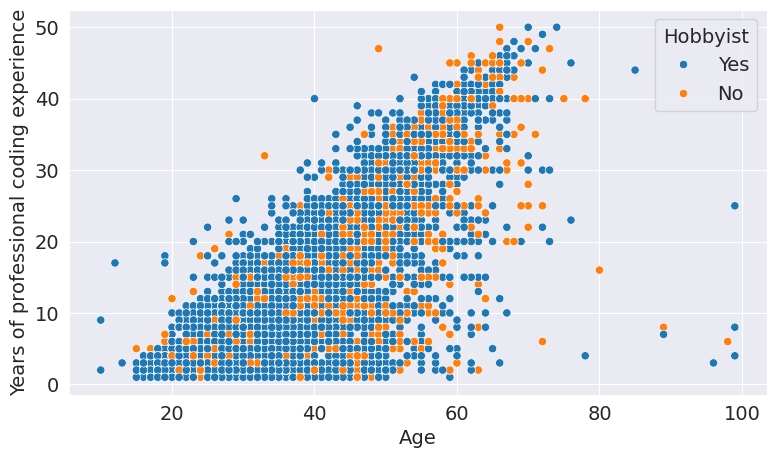

In [121]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_data)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

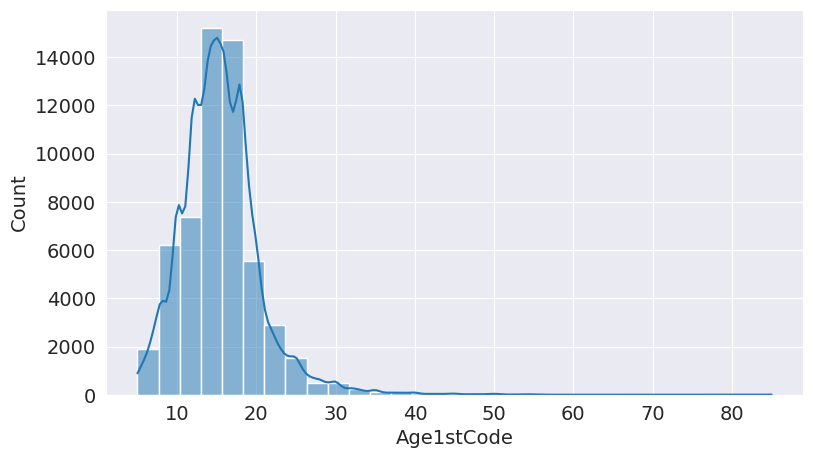

In [123]:
sns.histplot(x=survey_data.Age1stCode, bins=30, kde=True);

Key insights from the survey include:

1. The demographic representation suggests that while it reflects the programming community, there’s a notable lack of responses from non-English-speaking programmers and women/non-binary individuals.

2. The programming community still needs greater diversity. Efforts should continue to support underrepresented groups across various demographics.

3. While many programmers have degrees, a notable percentage did not major in computer science, demonstrating that a degree in this area is not essential for learning to code or building a programming career.

4. A considerable number of programmers work part-time or freelance, providing an accessible pathway for newcomers.

5. In 2020, JavaScript and HTML/CSS emerged as the most widely used programming languages, followed by SQL and Python.

6. Python is the most desired language to learn, praised for its simplicity and versatility.

7. On average, programmers work approximately 40 hours per week, with slight variations depending on the country.

8. Individuals of any age can start programming professionally, and those who enjoy it as a hobby are likely to enjoy long and fulfilling careers.